<a href="https://colab.research.google.com/github/Caseyshea96/Caseyshea96.github.io/blob/main/TopsailNDWI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 61.6 MB/s eta 0:00:00


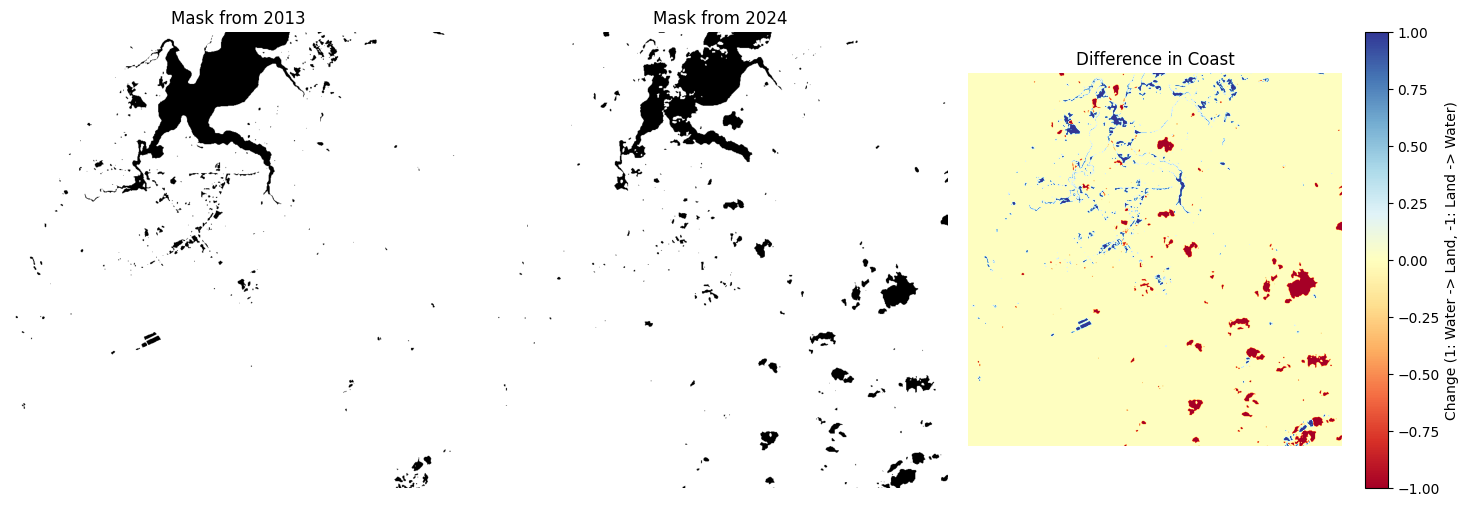

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Function to load a TIFF image
def load_tif(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1)

# Function to create binary mask using NDWI
def create_binary_mask(nir_band, green_band, threshold=0.1):
    nir_band = np.where(np.isnan(nir_band), 0, nir_band).astype(float)
    green_band = np.where(np.isnan(green_band), 0, green_band).astype(float)

    # Calculate NDWI
    ndwi = (nir_band - green_band) / (nir_band + green_band + 1e-10)  # Avoid division by zero
    ndwi_filtered = gaussian_filter(ndwi, sigma=1)  # Apply Gaussian filter to reduce noise

    return np.where(ndwi_filtered > threshold, 1, 0)  # Water = 1, Land = 0

# Load the TIFF images for the specified bands
band_2_2013 = load_tif('/content/drive/MyDrive/usgs nc/2013_b3.TIF')  # Band 3 (Green) for 2013
band_4_2013 = load_tif('/content/drive/MyDrive/usgs nc/2013_b5.TIF')  # Band 5 (NIR) for 2013
band_3_2024 = load_tif('/content/drive/MyDrive/usgs nc/2024_b3.TIF')  # Band 3 (Green) for 2024
band_5_2024 = load_tif('/content/drive/MyDrive/usgs nc/2024_b5.TIF')  # Band 5 (NIR) for 2024

# Create binary masks using the appropriate bands
mask_2013 = create_binary_mask(band_4_2013, band_2_2013)  # Using Band 5 (NIR) and Band 3 (Green) for 2013
mask_2024 = create_binary_mask(band_5_2024, band_3_2024)  # Using Band 5 (NIR) and Band 3 (Green) for 2024

# Calculate the difference in land/water areas
difference = mask_2024 - mask_2013  # 1 for water becoming land, -1 for land becoming water

# Function to plot results with zoom
def plot_results(mask_2013, mask_2024, difference, zoom_x=None, zoom_y=None):
    plt.figure(figsize=(15, 5))

    # Plot the first mask for 2013
    plt.subplot(1, 3, 1)
    plt.imshow(mask_2013, cmap='gray')
    plt.title('Mask from 2013')
    plt.axis('off')
    if zoom_x and zoom_y:
        plt.xlim(zoom_x)
        plt.ylim(zoom_y)

    # Plot the second mask for 2024
    plt.subplot(1, 3, 2)
    plt.imshow(mask_2024, cmap='gray')
    plt.title('Mask from 2024')
    plt.axis('off')
    if zoom_x and zoom_y:
        plt.xlim(zoom_x)
        plt.ylim(zoom_y)

    # Plot the difference
    plt.subplot(1, 3, 3)
    plt.imshow(difference, cmap='RdYlBu', vmin=-1, vmax=1)
    plt.title('Difference in Coast')
    plt.colorbar(label='Change (1: Water -> Land, -1: Land -> Water)')
    plt.axis('off')
    if zoom_x and zoom_y:
        plt.xlim(zoom_x)
        plt.ylim(zoom_y)

    plt.tight_layout()
    plt.show()

# Define zoom limits as tuples (xmin, xmax) and (ymin, ymax)
zoom_x = (1100, 2000)  # Adjust these values as needed
zoom_y = (1100, 2000)  # Adjust these values as needed

# Visualize the results with zoom
plot_results(mask_2013, mask_2024, difference, zoom_x, zoom_y)

